<a href="https://colab.research.google.com/github/georevge/Real_Fake_face/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
base_dir = '/content/drive/MyDrive/real_and_fake_face/'
train_dir = os.path.join(base_dir, 'training')
val_dir = os.path.join(base_dir, 'validation')

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation ,Dropout
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from keras.optimizers import Adam, SGD, RMSprop
from keras.metrics import categorical_crossentropy


from sklearn.preprocessing import MinMaxScaler
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers


import cv2

In [ ]:
val_folder=[val_dir+'/fake',val_dir+'/real']
train_folder=[train_dir+'/fake',train_dir+'/real']

def get_data(folders):
            images = []
            for folder in folders:
              for filename in os.listdir(folder):
                  img = cv2.imread(os.path.join(folder,filename))
                  res_img = cv2.resize(img, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)#224
                  norm = cv2.normalize(res_img, None, alpha=-1, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)#res_img
                  if img is not None:
                    images.append(norm)#norm
            return images

In [ ]:
from keras.layers.advanced_activations import LeakyReLU
from keras.regularizers import l2
model = Sequential()

# 1st hidden layer
model.add(Conv2D(32,(3,3),input_shape=(224,224,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.2))

# 2nd hidden layer
model.add(Conv2D(64,(3,3)))#,kernel_regularizer=regularizers.l2(0.0001)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3)))#,kernel_regularizer=regularizers.l2(0.0001)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.2))

model.add(Flatten())

# 1st fully connected layer
model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())

# 2nd fully connected layer
model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_81 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
batch_normalization_89 (Batc (None, 222, 222, 32)      128       
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
activation_96 (Activation)   (None, 109, 109, 64)      0         
_________________________________________________________________
batch_normalization_90 (Batc (None, 109, 109, 64)      256       
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 54, 54, 64)      

In [ ]:
X_train=get_data(train_folder)

In [ ]:
X_val=get_data(val_folder)

In [ ]:
X_train=np.array(X_train)
X_val=np.array(X_val)
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],3)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1],X_val.shape[2],3)

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

y_train=np.ones(1536)
y_train[0:768]=0

y_val=np.ones(384)
y_val[0:192]=0

In [ ]:
#Compile
opt = Adam(lr=0.000001)
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy', metrics=['accuracy'])#

In [ ]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss",
                                        mode ="min", patience = 5,
                                        restore_best_weights = True)
history=model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_val, y_val), shuffle=True, verbose=2, callbacks =[earlystopping])

Epoch 1/10
24/24 - 5s - loss: 0.2500 - accuracy: 0.9479 - val_loss: 0.7312 - val_accuracy: 0.5807
Epoch 2/10
24/24 - 4s - loss: 0.2009 - accuracy: 0.9753 - val_loss: 0.7421 - val_accuracy: 0.5781
Epoch 3/10
24/24 - 4s - loss: 0.1718 - accuracy: 0.9818 - val_loss: 0.7581 - val_accuracy: 0.5833
Epoch 4/10
24/24 - 4s - loss: 0.1518 - accuracy: 0.9889 - val_loss: 0.7723 - val_accuracy: 0.5755
Epoch 5/10
24/24 - 4s - loss: 0.1292 - accuracy: 0.9954 - val_loss: 0.7768 - val_accuracy: 0.5938
Epoch 6/10
24/24 - 4s - loss: 0.1141 - accuracy: 0.9974 - val_loss: 0.7915 - val_accuracy: 0.5807


In [ ]:
score = model.evaluate(X_val,y_val)
print('Test score: ', score[0])
print('Test accuracy: ', score[1])

12/12 [==============================] - 1s 33ms/step - loss: 0.7312 - accuracy: 0.5807
Test score:  0.7312336564064026
Test accuracy:  0.5807291865348816


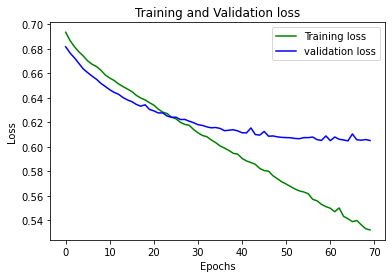

In [ ]:
import matplotlib.pyplot as plt

loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,70)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

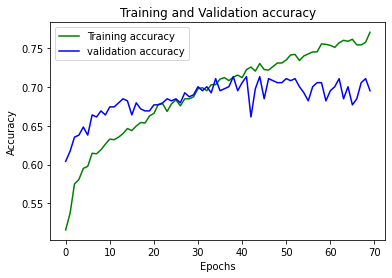

In [ ]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(0,70)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Confusion Matrix
%matplotlib inline
from sklearn.metrics import confusion_matrix

import itertools
import matplotlib.pyplot as plt

predictions=model.predict(x=X_val, batch_size=128, verbose=0)
rounded_predictions=np.argmax(predictions, axis=-1)

cm=confusion_matrix(y_true=y_val, y_pred=rounded_predictions)

def plot_colfusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
      cm=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
    else:
      print("Confusion matrix, without normalization")

    print(cm)
    thresh= cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[0])):
      plt.text(j, i, cm[i, j],
               horizontalalignment="center",
               color="red" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[129  63]
 [ 52 140]]


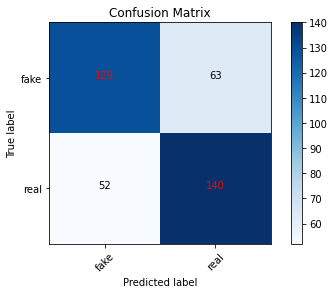

In [ ]:
cm_plot_labels=['fake', 'real']
plot_colfusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
from sklearn import metrics
precisions, recall, f1_score, samples_per_class = metrics.precision_recall_fscore_support(y_val, rounded_predictions,labels = [0,1])
print('Precision :',precisions,'\nRecall :',recall,'\nF1_Score :',f1_score,'\nSamples per class :',samples_per_class)

Precision : [0.70588235 0.69543147] 
Recall : [0.6875     0.71354167] 
F1_Score : [0.69656992 0.70437018] 
Samples per class : [192 192]
